Q1: How is total NYC budget allocated among departments? Among boroughs?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("payroll.csv")
data.head(2)

C:\Users\Default.DESKTOP-9HQJD85\AppData\Local\Temp\ipykernel_10492\1369759219.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("payroll.csv")


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


Index(['MANHATTAN', 'QUEENS', 'BROOKLYN', 'BRONX', 'RICHMOND'], dtype='object', name='Work Location Borough')


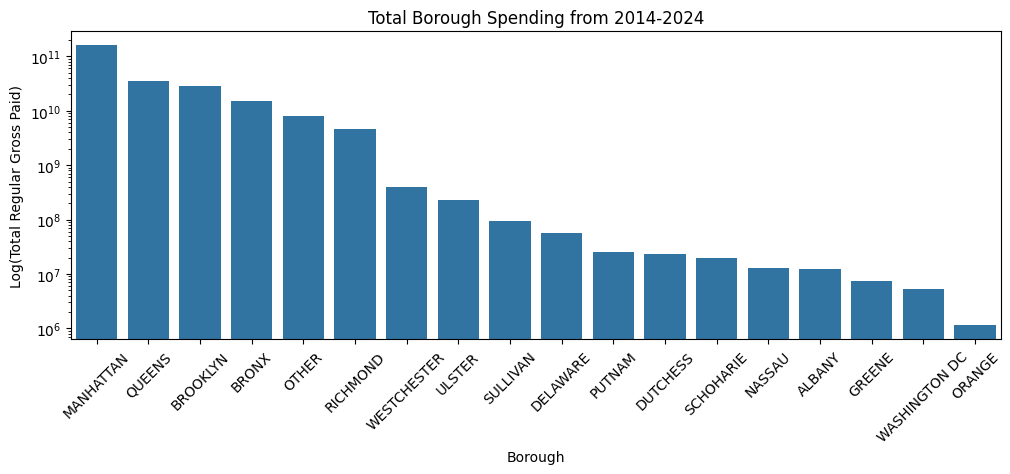

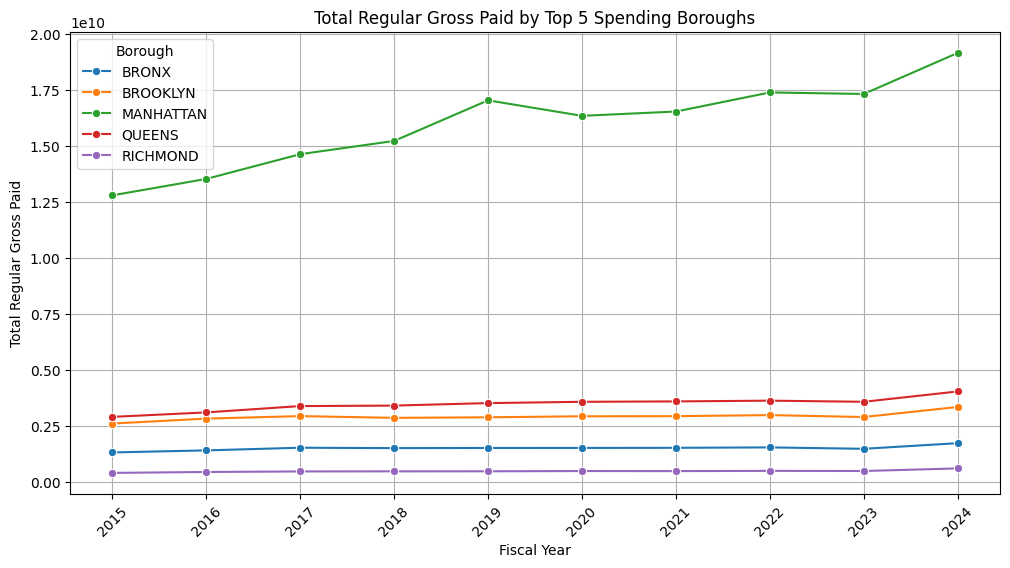

In [ ]:
#group and sum total payments per borough
borough_totals = data[data["Fiscal Year"]!= 2014].groupby("Work Location Borough")["Regular Gross Paid"].sum()
borough_totals_df = borough_totals.reset_index().sort_values("Regular Gross Paid", ascending=False)


plt.figure(figsize=(12,4))
sns.barplot(data=borough_totals_df, x = "Work Location Borough", y ="Regular Gross Paid")
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel("Borough")
plt.ylabel("Log(Total Regular Gross Paid)")
plt.title("Total Spending by Borough from 2014-2024")



#select top 4 boroughs
top_boroughs = borough_totals.drop("OTHER").nlargest(5).index

#new dataset to include only top boroughs, exclude incomplete data in 2014 and unknown "other" boroughs
filtered_data = data[(data["Work Location Borough"].isin(top_boroughs)) & (data["Fiscal Year"]!= 2014)]


#then do group by year and borough
borough_by_year = filtered_data.groupby(["Fiscal Year",'Work Location Borough'])['Regular Gross Paid'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=borough_by_year, x="Fiscal Year", y="Regular Gross Paid", hue="Work Location Borough", marker="o")
plt.xlabel("Fiscal Year")
plt.ylabel("Total Regular Gross Paid")
plt.title("Total Regular Gross Paid by Top 5 Spending Boroughs")
plt.xticks(borough_by_year["Fiscal Year"].unique(),rotation=45)
plt.legend(title="Borough")
plt.grid(True)

plt.show()

Index(['DEPT OF ED PEDAGOGICAL', 'POLICE DEPARTMENT', 'FIRE DEPARTMENT',
       'DEPT OF ED PARA PROFESSIONALS', 'DEPARTMENT OF EDUCATION ADMIN',
       'DEPARTMENT OF CORRECTION', 'DEPARTMENT OF SANITATION',
       'HRA/DEPT OF SOCIAL SERVICES', 'NYC HOUSING AUTHORITY',
       'DEPT OF ENVIRONMENT PROTECTION'],
      dtype='object', name='Agency Name')


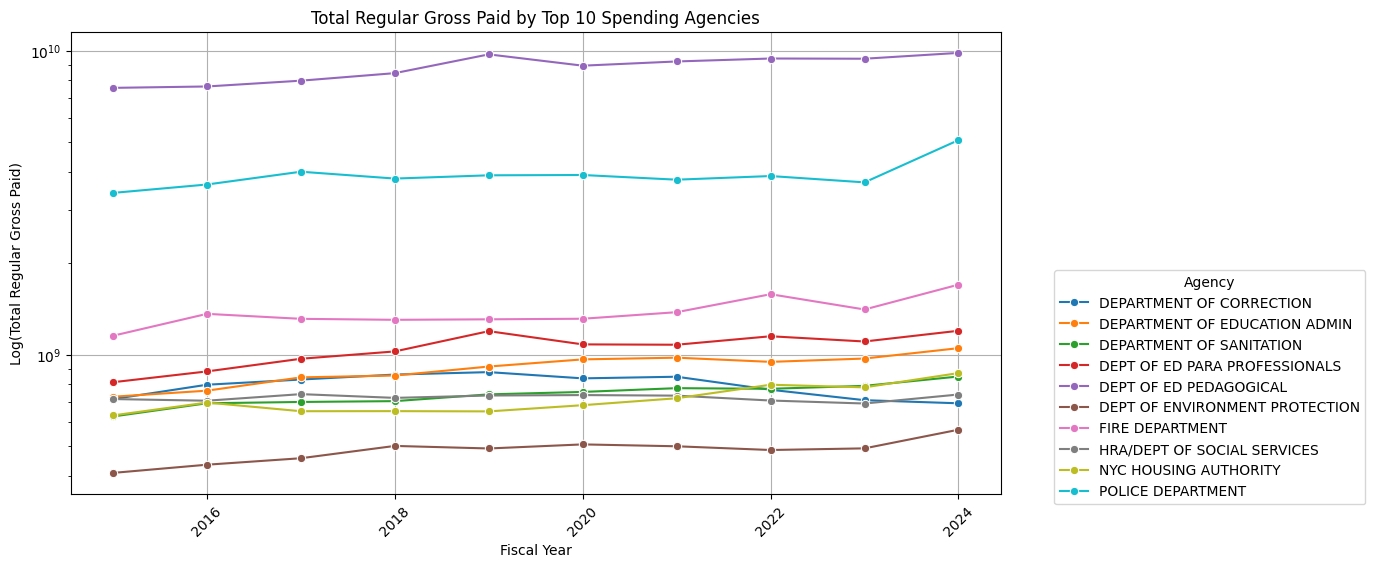

In [82]:
#group and sum total payments per borough
agency_totals = data.groupby("Agency Name")["Regular Gross Paid"].sum()


#select top 4 boroughs
top_agencies = agency_totals.nlargest(10).index
print(top_agencies)

#new dataset to include only top boroughs
filtered_data = data[(data["Agency Name"].isin(top_agencies)) & (data["Fiscal Year"]!= 2014)]

#then do group by year and borough
agency_by_year = filtered_data.groupby(["Fiscal Year","Agency Name",])['Regular Gross Paid'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=agency_by_year, x="Fiscal Year", y="Regular Gross Paid", hue="Agency Name", marker="o")
plt.xlabel("Fiscal Year")
plt.ylabel("Log(Total Regular Gross Paid)")
plt.title("Total Regular Gross Paid by Top 10 Spending Agencies")
plt.xticks(rotation=45)
plt.legend(title="Agency", bbox_to_anchor=(1.05, 0.5))
plt.yscale('log')
plt.grid(True)

plt.show()